import all dependencies

In [2]:
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt

import numpy as np
import re
import os

import dashscope
from dashscope import TextEmbedding
from dashvector import Client, Doc

import json

from sklearn.metrics.pairwise import cosine_similarity
from dashscope import Generation

create a test text database

In [3]:
import os
import fitz

from pysbd import Segmenter

segmenter = Segmenter()

def read_pdfs_to_list(folder_path):
    pdf_texts = []
    for filename in os.listdir(folder_path):
        if filename.endswith('.pdf'):
            file_path = os.path.join(folder_path, filename)
            with fitz.open(file_path) as doc:
                full_text = ""
                for page in doc:
                    full_text += page.get_text()
                
                full_text = re.sub(r"\n", " ", full_text)
                full_text = re.sub(r"\xa0", " ", full_text)
                full_text = re.sub(r"- ", "", full_text)
                pdf_texts.append(segmenter.segment(full_text.lower()))
    return pdf_texts

folder_path = 'D:\\RexZhann\\nlp\\papers'


pdf_texts = read_pdfs_to_list(folder_path)

pdf_texts


[['thelcd-10 classification of mental and behavioural disorders clinical descriptions and diagnostic guidelines |  world health organization i  geneva i  1992 icd-10 reprinted 1993, 1994, 1995, 1998, 2000, 2002, 2004 who library cataloguing in publication data the icd-10 classification of mental and behavioural disorders : clinical descriptions and diagnostic guidelines. ',
  '1.mental disorders — classification  2.mental disorders — diagnosis isbn 92 4 154422 8  (nlm classification: wm 15) © world health organization 1992 all rights reserved. ',
  'publications of the world health organization can be obtained from marketing and dissemination, world health organization, 20 avenue appia, 1211 geneva 27, switzerland (tel: +41 22 791 2476; fax: +41 22 791 4857; email: bookorders@who.int). ',
  'requests for permission to reproduce or translate who publications — whether for sale or for noncommercial distribution — should be addressed to publications, at the above address (fax: +41 22 791 

In [1]:
import os
import re

from pysbd import Segmenter

segmenter = Segmenter()

def read_txts_to_list(folder_path):
    txt_texts = []
    for filename in os.listdir(folder_path):
        if filename.endswith('.txt'):
            file_path = os.path.join(folder_path, filename)
            with open(file_path, 'r', encoding='utf-8') as file:
                full_text = file.read()
                
                # 清理文本，替换换行符和非打印字符
                full_text = re.sub(r"\n", " ", full_text)
                full_text = re.sub(r"\xa0", " ", full_text)
                
                # 去除可能存在的其他不需要的字符或格式
                full_text = re.sub(r"- ", "", full_text)
                
                # 使用pysbd进行句子分割
                txt_texts.append(segmenter.segment(full_text.lower()))
    return txt_texts

folder_path = 'D:\\RexZhann\\nlp\\papers'

txt_texts = read_txts_to_list(folder_path)

# 打印或处理txt_texts列表
txt_texts

[["f00-f09 organic, including symptomatic, mental disorders  overview of this block  f00 dementia in alzheimer's disease      f00.0 dementia in alzheimer's disease with early onset      f00.1 dementia in alzheimer's disease with late onset      f00.2 dementia in alzheimer's disease, atypical or mixed type      f00.9 dementia in alzheimer's disease, unspecified  f01 vascular dementia      f01.0 vascular dementia of acute onset      f01.1 multi-infarct dementia      f01.2 subcortical vascular dementia      f01.3 mixed cortical and subcortical vascular dementia      f01.8 other vascular dementia      f01.9 vascular dementia, unspecified  f02 dementia in other diseases classified elsewhere      f02.0 dementia in pick's disease      f02.1 dementia in creutzfeldt jakob disease      f02.2 dementia in huntington's disease      f02.3 dementia in parkinson's disease      f02.4 dementia in human immunodeficiency virus [hiv] disease      f02.8 dementia in other specified diseases classified elsewh

In [126]:
keyword = 'dementia'

In [87]:
def find_related_sent(keyword, sentences):
    related_sent = []
    for sent_per_text in sentences:
        for i, sent in enumerate(sent_per_text):
            if keyword.lower() in sent.lower():
                for j in range(np.max([0, i - 5]), np.min([i + 5, len(sent_per_text)])):
                    if sent_per_text[j] not in related_sent:
                        related_sent.append(sent_per_text[j])
    return related_sent


articles = find_related_sent(keyword, txt_texts)
len(articles)

430

In [65]:
articles

['it is the second of these 2 definition of mental disorder, including the dysfunction  functions that has been the focus of most of the criticism of requirement, the definition was not systematically  the latest edition of the manual, dsm-5.1 the claim has been applied in the construction of diagnostic criteria sets in  that the dsm-5 definitions for numerous disorders fail to  this or any earlier dsms. ',
 'validly differentiate disordered symptomatic presentations • given that most psychiatric symptoms can occur in  from nondisordered symptomatic presentations, thus         normal people, and given our lack of knowledge of                                              2              psychological and biological mechanisms underlying  creating a risk of wholesale false-positive diagnoses.     ',
 'symptoms, various strategies must be used to ensure  the  dsm’s  definition  of  mental  disorder  and  how it  that symptom-based criteria are pathosuggestive and                           

In [66]:
articles = articles[30:480]

In [ ]:
articles = ['Depressive disorder (also known as depression) is a common mental disorder. It involves a depressed mood or loss of pleasure or interest in activities for long periods of time.',
            'Depression is different from regular mood changes and feelings about everyday life. It can affect all aspects of life, including relationships with family, friends and community. It can result from or lead to problems at school and at work.',
            'During a depressive episode, a person experiences a depressed mood (feeling sad, irritable, empty). They may feel a loss of pleasure or interest in activities.',
            'Major depression includes symptoms of depressed mood or loss of interest, most of the time for at least 2 weeks, that interfere with daily activities.',
            'Due to the limitations of the above loss functions, we aim to design a loss function that directly optimizes the cosine function for consistency in training and prediction and can be widely used across various datasets.',
            'Though depression and grief share some features, depression is different from grief felt after losing a loved one or sadness felt after a traumatic life event. Depression usually involves self-loathing or a loss of self-esteem, while grief typically does not.',
]


In [17]:
dashscope.api_key='sk-b8ba4c6e0c9b4e7697fd3cdaaebe63f7'

def generate_embeddings(text):
    rsp = TextEmbedding.call(model=TextEmbedding.Models.text_embedding_v2,
                             input=text)
    embeddings = [record['embedding'] for record in rsp.output['embeddings']]
    return embeddings if isinstance(text, list) else embeddings[0]


用qwen大模型api进行的分词

In [ ]:
def tokenizer(articles):
    prompt = f'''complete the #OBJECTIVE# based on the #CONTEXT#, and generate the output based on #STYLE# and #RESPONSE#
    # CONTEXT #
    You are an expert at tokenizing text based on the context of the text, including extracting out any possible phrases and chunks of nouns
    # OBJECTIVE #
    tokenize these paragraphs:{articles}
    # STYLE #
    output only the result of tokenization, separated by quotation and space.
    # RESPONSE #
    do not output anything other than the result of tokenization
    '''
    
    rsp = Generation.call(model='qwen-turbo', prompt=prompt)
    return rsp.output.text

In [18]:
from tqdm import tqdm

In [101]:
def tokenizer_batch(articles, batchsize=6):
    def batch_generator(articles, batchsize):
        for i in range(0, len(articles), batchsize):
            yield articles[i:i + batchsize]
    
    tokenized_results = []
    
    with tqdm(total=len(articles) // batchsize + (len(articles) % batchsize > 0)) as pbar:
        for idx, batch in enumerate(batch_generator(articles, batchsize)):
            
            debug_info = f"Processing batch {idx + 1}/{len(articles) // batchsize + (len(articles) % batchsize > 0)} with {len(batch)} phrases"
            
            print(f"Debug: {debug_info}")  
            
            prompt = f'''complete the #OBJECTIVE# based on the #CONTEXT#, and generate the output based on #STYLE# and #RESPONSE#
            # CONTEXT #
            You are an professional and seasoned expert with 20 years experience of tokenizing text based on the deep connection 
            within context and dependency of the text, including extracting out any possible phrases and chunks of nouns. You are also
            good at recognizing the logical relation between the phrases in one context.
            # OBJECTIVE #
            tokenize these paragraphs by phrases and chunks of nouns:{' '.join(batch)}
            # STYLE #
            output only the result of tokenization, separated by quotation and comma, no linebreaks. Prefer chunks of nouns than 
            single nouns, try to output chunks of nouns when possible.
            # RESPONSE #
            do not output anything other than the result of tokenization, do not output too many single-word tokens. Do not output 
            complete sentences.Do not output any stopwords that's not part of a phrase.
            '''
            
            rsp = Generation.call(model='qwen-turbo', prompt=prompt)
            tokenized_results.append(rsp.output.text.strip())
            
            pbar.update(len(batch))  
    
    return tokenized_results


In [ ]:
'''# CONTEXT #
    You are an expert at tokenizing text based on the context of the text, including etracting out any possible phrases and chunks of nouns
    # OBJECTIVE #
    tokenize these paragraphs:['Depressive disorder (also known as depression) is a common mental disorder. It involves a depressed mood or loss of pleasure or interest in activities for long periods of time.',
                'Depression is different from regular mood changes and feelings about everyday life. It can affect all aspects of life, including relationships with family, friends and community. It can result from or lead to problems at school and at work.',
                'During a depressive episode, a person experiences a depressed mood (feeling sad, irritable, empty). They may feel a loss of pleasure or interest in activities.',
                'Major depression includes symptoms of depressed mood or loss of interest, most of the time for at least 2 weeks, that interfere with daily activities.',
                'Due to the limitations of the above loss functions, we aim to design a loss function that directly optimizes the cosine function for consistency in training and prediction and can be widely used across various datasets.',
                'Though depression and grief share some features, depression is different from grief felt after losing a loved one or sadness felt after a traumatic life event. Depression usually involves self-loathing or a loss of self-esteem, while grief typically does not.',
    ]
    # STYLE #
    output only the result of tokenization, separated by quotation and comma, no linebreaks.
    # RESPONSE #
    do not output anything other than the result of tokenization
    '''
    

In [102]:
res = tokenizer_batch(articles)

phrases_llm = [re.findall(r'"(.*?)"', phrase) for phrase in res]



  0%|          | 0/72 [00:00<?, ?it/s]

Debug: Processing batch 1/72 with 6 phrases


  8%|▊         | 6/72 [00:08<01:29,  1.36s/it]

Debug: Processing batch 2/72 with 6 phrases


 17%|█▋        | 12/72 [00:10<00:49,  1.21it/s]

Debug: Processing batch 3/72 with 6 phrases


 25%|██▌       | 18/72 [00:13<00:35,  1.50it/s]

Debug: Processing batch 4/72 with 6 phrases


 33%|███▎      | 24/72 [00:15<00:24,  1.93it/s]

Debug: Processing batch 5/72 with 6 phrases


 42%|████▏     | 30/72 [00:17<00:18,  2.29it/s]

Debug: Processing batch 6/72 with 6 phrases


 50%|█████     | 36/72 [00:19<00:14,  2.44it/s]

Debug: Processing batch 7/72 with 6 phrases


 58%|█████▊    | 42/72 [00:20<00:10,  2.94it/s]

Debug: Processing batch 8/72 with 6 phrases


 67%|██████▋   | 48/72 [00:23<00:09,  2.53it/s]

Debug: Processing batch 9/72 with 6 phrases


 75%|███████▌  | 54/72 [00:28<00:09,  2.00it/s]

Debug: Processing batch 10/72 with 6 phrases


 83%|████████▎ | 60/72 [00:29<00:05,  2.35it/s]

Debug: Processing batch 11/72 with 6 phrases


 92%|█████████▏| 66/72 [00:30<00:02,  2.76it/s]

Debug: Processing batch 12/72 with 6 phrases


100%|██████████| 72/72 [00:33<00:00,  2.47it/s]

Debug: Processing batch 13/72 with 6 phrases


78it [00:35,  2.89it/s]                        

Debug: Processing batch 14/72 with 6 phrases


84it [00:36,  3.03it/s]

Debug: Processing batch 15/72 with 6 phrases


90it [00:43,  1.80it/s]

Debug: Processing batch 16/72 with 6 phrases


96it [00:45,  2.04it/s]

Debug: Processing batch 17/72 with 6 phrases


102it [00:48,  2.08it/s]

Debug: Processing batch 18/72 with 6 phrases


108it [00:49,  2.46it/s]

Debug: Processing batch 19/72 with 6 phrases


114it [00:53,  2.19it/s]

Debug: Processing batch 20/72 with 6 phrases


120it [00:55,  2.16it/s]

Debug: Processing batch 21/72 with 6 phrases


126it [00:57,  2.63it/s]

Debug: Processing batch 22/72 with 6 phrases


132it [00:59,  2.44it/s]

Debug: Processing batch 23/72 with 6 phrases


138it [01:01,  2.67it/s]

Debug: Processing batch 24/72 with 6 phrases


144it [01:04,  2.61it/s]

Debug: Processing batch 25/72 with 6 phrases


150it [01:05,  2.94it/s]

Debug: Processing batch 26/72 with 6 phrases


156it [01:07,  2.77it/s]

Debug: Processing batch 27/72 with 6 phrases


162it [01:10,  2.77it/s]

Debug: Processing batch 28/72 with 6 phrases


168it [01:12,  2.81it/s]

Debug: Processing batch 29/72 with 6 phrases


174it [01:14,  2.78it/s]

Debug: Processing batch 30/72 with 6 phrases


180it [01:15,  3.44it/s]

Debug: Processing batch 31/72 with 6 phrases


186it [01:16,  3.62it/s]

Debug: Processing batch 32/72 with 6 phrases


192it [01:18,  3.43it/s]

Debug: Processing batch 33/72 with 6 phrases


198it [01:24,  2.02it/s]

Debug: Processing batch 34/72 with 6 phrases


204it [01:26,  2.15it/s]

Debug: Processing batch 35/72 with 6 phrases


210it [01:29,  2.11it/s]

Debug: Processing batch 36/72 with 6 phrases


216it [01:31,  2.31it/s]

Debug: Processing batch 37/72 with 6 phrases


222it [01:33,  2.52it/s]

Debug: Processing batch 38/72 with 6 phrases


228it [01:35,  2.88it/s]

Debug: Processing batch 39/72 with 6 phrases


234it [01:36,  3.15it/s]

Debug: Processing batch 40/72 with 6 phrases


240it [01:38,  3.18it/s]

Debug: Processing batch 41/72 with 6 phrases


246it [01:40,  3.12it/s]

Debug: Processing batch 42/72 with 6 phrases


252it [01:42,  3.15it/s]

Debug: Processing batch 43/72 with 6 phrases


258it [01:44,  3.08it/s]

Debug: Processing batch 44/72 with 6 phrases


264it [01:45,  3.36it/s]

Debug: Processing batch 45/72 with 6 phrases


270it [01:47,  3.66it/s]

Debug: Processing batch 46/72 with 6 phrases


276it [01:48,  3.59it/s]

Debug: Processing batch 47/72 with 6 phrases


282it [01:49,  4.00it/s]

Debug: Processing batch 48/72 with 6 phrases


288it [01:51,  3.96it/s]

Debug: Processing batch 49/72 with 6 phrases


294it [01:53,  3.41it/s]

Debug: Processing batch 50/72 with 6 phrases


300it [01:55,  3.48it/s]

Debug: Processing batch 51/72 with 6 phrases


306it [01:56,  3.74it/s]

Debug: Processing batch 52/72 with 6 phrases


312it [01:58,  3.94it/s]

Debug: Processing batch 53/72 with 6 phrases


318it [02:00,  3.54it/s]

Debug: Processing batch 54/72 with 6 phrases


324it [02:01,  3.57it/s]

Debug: Processing batch 55/72 with 6 phrases


330it [02:03,  3.47it/s]

Debug: Processing batch 56/72 with 6 phrases


336it [02:04,  3.98it/s]

Debug: Processing batch 57/72 with 6 phrases


342it [02:07,  3.19it/s]

Debug: Processing batch 58/72 with 6 phrases


348it [02:09,  3.01it/s]

Debug: Processing batch 59/72 with 6 phrases


354it [02:11,  3.13it/s]

Debug: Processing batch 60/72 with 6 phrases


360it [02:14,  2.53it/s]

Debug: Processing batch 61/72 with 6 phrases


366it [02:18,  2.21it/s]

Debug: Processing batch 62/72 with 6 phrases


372it [02:20,  2.49it/s]

Debug: Processing batch 63/72 with 6 phrases


378it [02:22,  2.57it/s]

Debug: Processing batch 64/72 with 6 phrases


384it [02:23,  2.89it/s]

Debug: Processing batch 65/72 with 6 phrases


390it [02:46,  1.37s/it]

Debug: Processing batch 66/72 with 6 phrases


396it [02:49,  1.12s/it]

Debug: Processing batch 67/72 with 6 phrases


402it [02:53,  1.02it/s]

Debug: Processing batch 68/72 with 6 phrases


408it [02:58,  1.09it/s]

Debug: Processing batch 69/72 with 6 phrases


414it [02:59,  1.35it/s]

Debug: Processing batch 70/72 with 6 phrases


420it [03:03,  1.49it/s]

Debug: Processing batch 71/72 with 6 phrases


426it [03:06,  1.57it/s]

Debug: Processing batch 72/72 with 4 phrases


430it [03:09,  2.27it/s]


In [108]:
import nltk
from nltk.corpus import stopwords
from typing import List

# 首先，确保你已经下载了nltk的停用词列表
nltk.download('stopwords')

# 获取英文停用词列表，包括连词和介词
stop_words = set(stopwords.words('english'))

phrases_llm = [[phrase for phrase in phrases if len(phrase) <= 30 and len(phrase) > 4 and '%' not in phrase and phrase not in stop_words] for phrases in phrases_llm]
phrases_llm = [phrases for phrases in phrases_llm if len(phrases) != 0]
len(phrases_llm)

[nltk_data] Error loading stopwords: Remote end closed connection
[nltk_data]     without response


72

In [104]:
phrases_llm

[['mental disorder',
  'syndrome characterized',
  'cognition',
  'emotion regulation',
  'behavior',
  'dysfunction',
  'psychological',
  'biological',
  'developmental processes',
  'person',
  'mental functioning',
  'distress',
  'social role impairment',
  'socially deviant behavior',
  'conflicts',
  'individual',
  'society',
  'dsm’s approach',
  'concept of mental disorder',
  'clinically significant',
  'warrant clinical attention',
  'problematic conditions',
  'deviance',
  'funktioning',
  'dsm-5’s definition',
  'psychological mechanisms',
  'logical relation',
  'extracting out',
  'possible phrases',
  'chunks of nouns',
  'context',
  'dependency of the text',
  'tokenizing',
  'paragraphs',
  'syndromes',
  'symptoms',
  'funktioning',
  'biological',
  'developmental processes',
  'dysfunction',
  'individual',
  'sufficient evidence',
  'infer persuasively',
  'harmful dysfunction',
  'analysis of the concept',
  'mental disorder',
  'central aspects',
  'definitio

In [ ]:
phrases_llm = re.findall(r'"(.*?)"', tokenizer(articles))
phrases_llm
tokenizer(articles)

用Spacy模型进行的分词（用时0.8但需要根据语言调整依赖关系筛选）

In [ ]:
import spacy

nlp = spacy.load("en_core_web_sm")

def extract_phrases(doc):
    phrases = []

    # 提取名词短语
    for chunk in doc.noun_chunks:
        phrases.append(chunk.text)
    
    # 提取动词短语
    for token in doc:
        if token.dep_ in ('ROOT', 'acl', 'advcl', 'relcl'):
            phrases.append(' '.join([child.text for child in token.subtree]))

    # 提取副词短语
    for token in doc:
        if token.pos_ == 'ADV':
            adverb_phrase = [token.text]
            adverb_phrase.extend([child.text for child in token.children])
            phrases.append(' '.join(adverb_phrase))

    # 提取介词短语并拼接修饰的主体
    for token in doc:
        if token.dep_ == 'prep':  # 如果是介词
            prep_phrase = ' '.join([child.text for child in token.subtree])
            head = token.head
            head_phrase = head.text
            if head.dep_ in ('ROOT', 'acl', 'advcl', 'relcl', 'pobj', 'dobj', 'nsubj'):
                head_phrase = ' '.join([child.text for child in head.subtree])
            phrases.append([f"{head_phrase}", 1])
    
    return phrases

# 提取所有文章中的短语
all_phrases = []
for article in articles:
    doc = nlp(article)
    phrases = extract_phrases(doc)
    all_phrases.extend(phrases)


print("phrases extracted:")
for phrase in all_phrases:
    print(phrase)

In [ ]:
docs = [nlp(article) for article in articles]
for token in docs[0]:
    print([token.text, token.dep_])

用BERT模型分词(用时3m56)

In [ ]:
# 加载 DistilBERT 模型和 tokenizer
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
model = DistilBertModel.from_pretrained('distilbert-base-uncased')

# 提取短语函数
def extract_phrases(article):
    phrases = []
    sentences = article.split('.')
    for sentence in sentences:
        words = sentence.split()
        phrases.extend(words)
    return phrases

# 提取所有文章中的短语
all_phrases = []
for article in articles:
    phrases = extract_phrases(article)
    all_phrases.extend(phrases)

Prepare for embedding and vecotr search

In [24]:
client = Client(
  api_key='sk-0R9jI2212bV7Ma7u7ba4UmX8QQ8Gt2E2060C14D5411EF9A1EB61E393DC850',
  endpoint='vrs-cn-0mm3ulqnq00032.dashvector.cn-hangzhou.aliyuncs.com'
)

collection = client.get('sample1')
assert collection

In [41]:
phrases_llm[0]

['these symptoms',
 'appear in some individuals',
 'following ingestion',
 'as little as 250 mg of caffeine per day',
 'whereas others',
 'require much larger doses',
 'levels of more than i g/day',
 'muscle twitchings',
 'periods of inexhaustibility',
 'psychomotor agitation',
 'rambling flow of thought and speech',
 'cardiac arrhythmia',
 'mild sensory disturbances',
 'ringing in the ears',
 'flashes of light',
 'higher doses',
 'with doses exceeding 10 g of caffeine',
 'grand mal seizures',
 'respiratory failure',
 'result in death',
 'this disorder',
 'called caffeinism',
 'coffee contains 100150 mg of caffeine per cup',
 'tea is about half as strong',
 'glass of cola',
 'about a third as strong']

In [ ]:
for phrase in phrases_llm:
    # 批量 embedding

    embedding = generate_embeddings(phrase)


    
    rsp = collection.insert(
        
        Doc(id=str(len(phrase)), vector=embedding, fields={"title": phrase}) 
           
    )
    assert rsp

In [109]:
def batch_generator(items, batchsize):
    for i in range(0, len(items), batchsize):
        yield items[i:i + batchsize]

def process_phrases(phrases_llm, batchsize=6):
    for batch in batch_generator(phrases_llm, batchsize):
        
        for sent in batch:
            embeddings = [generate_embeddings(phrase) for phrase in sent]

            
            docs = [Doc(id=str(len(phrase)), vector=embedding, fields={"title": phrase}) 
                    for phrase, embedding in zip(sent, embeddings)]
        
        rsp = collection.insert(docs)
        assert rsp
process_phrases(phrases_llm, batchsize=5)


这里用测试的输入词‘{}’尝试输出

In [110]:
rsp = collection.query(generate_embeddings(keyword), output_fields=['title'],topk=30)


related_phrases = [doc.fields['title'] for doc in rsp.output][4:20]
related_phrases_embeddings = [doc.vector for doc in rsp.output][4:20]


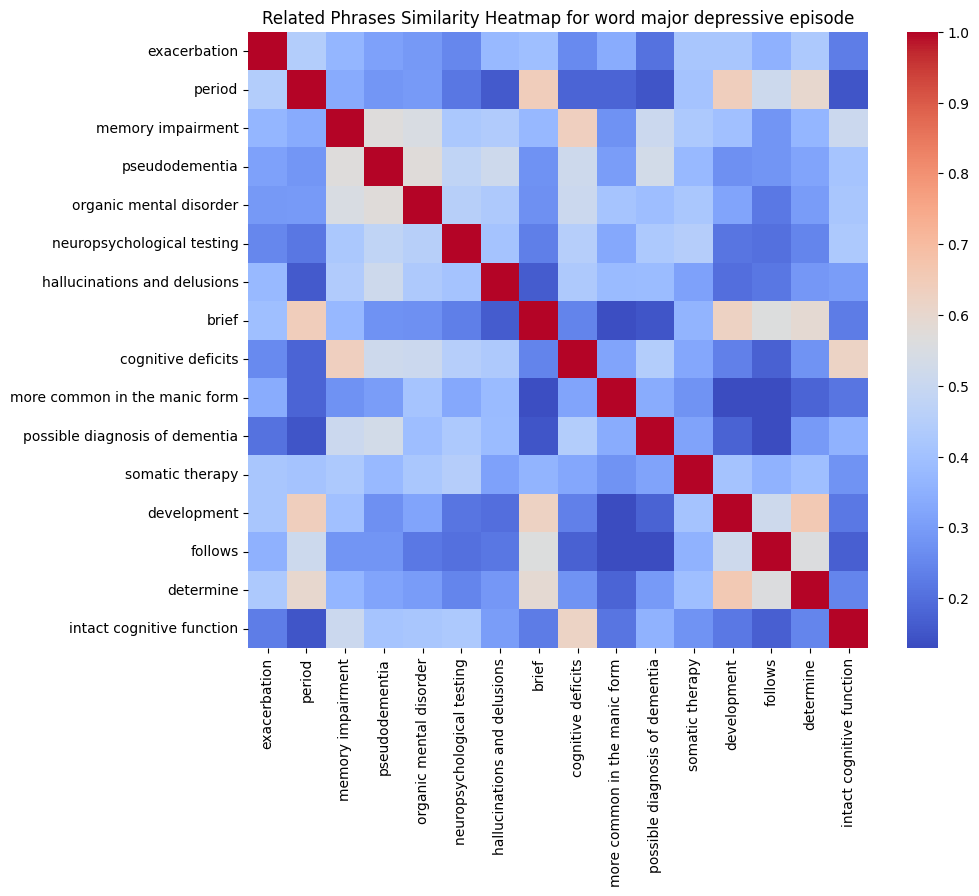

In [111]:
related_phrases_embeddings = [generate_embeddings(phrase) for phrase in related_phrases]

similarity_matrix = cosine_similarity(related_phrases_embeddings)

plt.figure(figsize=(10, 8))
sns.heatmap(similarity_matrix, xticklabels=related_phrases, yticklabels=related_phrases, cmap='coolwarm')
plt.title(f'Related Phrases Similarity Heatmap for word {keyword}')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

可以继续优化删除掉与原词相似度太高的词（相似度太高说明是近义词，与我们需要的逻辑关系不符），但是感觉也并没有实现筛选出固定语义的目的

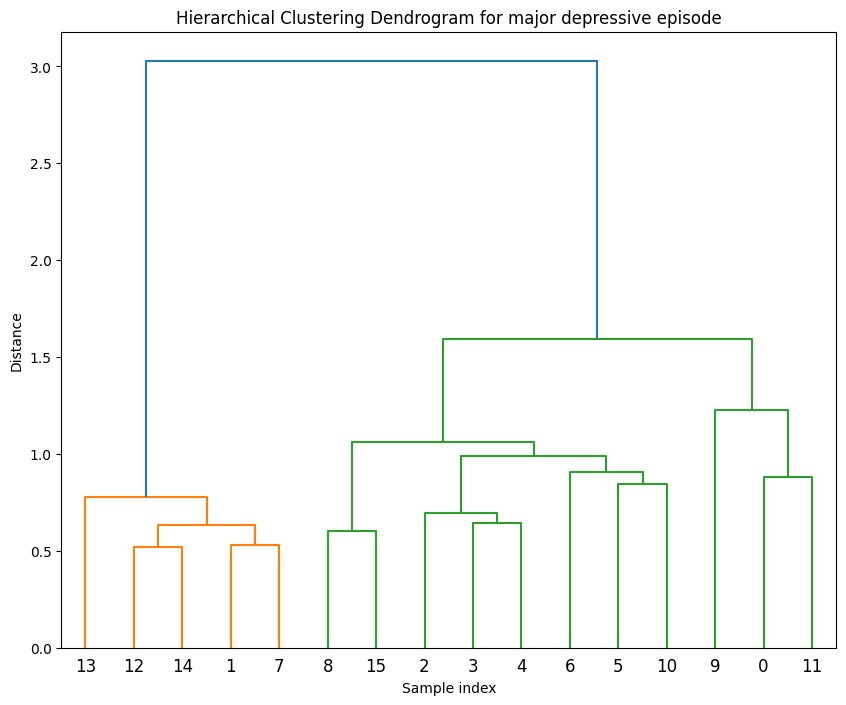

In [112]:
from scipy.cluster.hierarchy import dendrogram, linkage

# 层次聚类
Z = linkage(similarity_matrix, 'ward')

# 绘制层次聚类树状图
plt.figure(figsize=(10, 8))
dendrogram(Z)
plt.title(f'Hierarchical Clustering Dendrogram for {keyword}')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

In [120]:
from scipy.cluster.hierarchy import linkage, fcluster
import numpy as np

# 使用相似度矩阵进行层次聚类
Z = linkage(1 - similarity_matrix, 'ward')  # 使用1减去相似度矩阵作为距离矩阵

# 将短语分为k类
k = 5  # 假设我们要分为5类
clusters = fcluster(Z, k, criterion='maxclust')

def get_representative_phrases(similarity_matrix, clusters, k, related_phrases, related_phrases_embeddings):
    rep_phrases = []
    rep_phrase_emb = []
    for cluster_id in range(1, k + 1):
        cluster_indices = [i for i, c in enumerate(clusters) if c == cluster_id]
        cluster_similarity = similarity_matrix[cluster_indices][:, cluster_indices]
        centroid_index = np.argmax(np.sum(cluster_similarity, axis=0))
        rep_index = cluster_indices[centroid_index]
        rep_phrases.append(related_phrases[rep_index])
        rep_phrase_emb.append(related_phrases_embeddings[rep_index])
    return rep_phrases, rep_phrase_emb

# 获取代表性短语
final_phrases, final_emb = get_representative_phrases(similarity_matrix, clusters, k, related_phrases, related_phrases_embeddings)
print(f"Final {k} characteristics of {keyword}:")


for phrase in final_phrases:
    print(phrase)


Final 5 characteristics of major depressive episode:
development
cognitive deficits
pseudodementia
exacerbation
more common in the manic form


In [121]:
def get_representative_phrases( clusters, k, related_phrases, related_phrases_embeddings, target_emb):
    rep_phrases = []
    rep_phrase_emb = []
    
    # 计算target_emb与所有短语嵌入的相似度
    target_similarity = np.dot(related_phrases_embeddings, target_emb)
    
    for cluster_id in range(1, k + 1):
        cluster_indices = [i for i, c in enumerate(clusters) if c == cluster_id]
        
        # 如果当前聚类中没有元素，则跳过
        if not cluster_indices:
            continue
        
        # 计算target_emb与当前聚类中所有短语的相似度
        cluster_similarities = target_similarity[cluster_indices]
        
        # 找出与target_emb最相似的短语索引
        max_similarity_index = np.argmax(cluster_similarities)
        rep_index = cluster_indices[max_similarity_index]
        
        # 添加代表性短语和其嵌入向量
        rep_phrases.append(related_phrases[rep_index])
        rep_phrase_emb.append(related_phrases_embeddings[rep_index])
        
    return rep_phrases, rep_phrase_emb

final_phrases, final_emb = get_representative_phrases(clusters, k, related_phrases, related_phrases_embeddings, generate_embeddings(keyword))
print(f"Final {k} characteristics of {keyword}:")
for phrase in final_phrases:
    print(phrase)

Final 5 characteristics of major depressive episode:
period
cognitive deficits
memory impairment
exacerbation
more common in the manic form


计算输出的负相关性，负相关性是衡量输出重复度的重要指标

In [122]:
def average_dot_product(vectors):
    n = len(vectors)
    dot_products = []

    for i in range(n):
        for j in range(i + 1, n):
            dot_product = np.dot(vectors[i], vectors[j])
            dot_products.append(dot_product)
    
    average_dot = np.mean(dot_products)
    return average_dot

ave_dot = average_dot_product(final_emb)
ave_cos = np.mean(cosine_similarity(final_emb))

print(f'average dot product is {ave_dot}')
print(f'average cosine similarity is {ave_cos}')

average dot product is 0.33248150233442114
average cosine similarity is 0.4659852018675367


这里用大模型尝试恢复到原本的输入词‘symptoms of depression'

In [123]:
def retrieve(articles, final_phrases):
    prompt = f'''complete the #OBJECTIVE# based on the #CONTEXT#, and generate the output based on #STYLE# and #RESPONSE#
    # CONTEXT #
    You are an expert at retrieving a phrase from a text database given a list of the characteristics of that phrase.
    # OBJECTIVE #
    Pick exactly one phrase or word from the text database that best fits the list of characteristics.

    list of characteristics: {final_phrases}

    text database: {articles}

    # STYLE #
    output only the result of phrase retrieval. 
    The result could be a single word or a short phrase, but never a sentence. 
    The result must be from the text database.
    Set the temperature parameter to 0 to ensure a precise output
    # RESPONSE #
    do not output anything other than the result of retrieval
    '''
    
    rsp = Generation.call(model='qwen-max', prompt=prompt)
    return rsp.output.text

In [124]:
def retriever_batch(articles, final_phrases, batchsize=6):
    def batch_generator(articles, batchsize):
        for i in range(0, len(articles), batchsize):
            yield articles[i:i + batchsize]
    
    tokenized_results = []
    
    with tqdm(total=len(articles) // batchsize + (len(articles) % batchsize > 0)) as pbar:
        for idx, batch in enumerate(batch_generator(articles, batchsize)):
            
            debug_info = f"Processing batch {idx + 1}/{len(articles) // batchsize + (len(articles) % batchsize > 0)} with {len(batch)} phrases"
            
            print(f"Debug: {debug_info}")  
            
            prompt = f'''complete the #OBJECTIVE# based on the #CONTEXT#, and generate the output based on #STYLE# and #RESPONSE#
            # CONTEXT #
            You are an expert at retrieving a phrase from a text database given a list of the characteristics of that phrase.
            # OBJECTIVE #
            Pick exactly one phrase or word from the text database that best fits the list of characteristics.

            list of characteristics: {final_phrases}

            text database: {batch}

            # STYLE #
            output only the result of phrase retrieval. 
            The result could be a single word or a short phrase, but never a sentence. 
            The result must be from the text database.
            Set the temperature parameter to 0 to ensure a precise output
            # RESPONSE #
            do not output anything other than the result of retrieval
            '''
            
            rsp = Generation.call(model='qwen-turbo', prompt=prompt)
            tokenized_results.append(rsp.output.text.strip())
            
            pbar.update(len(batch))  # 更新进度条
     
    return tokenized_results

In [125]:
retrieval = retriever_batch(articles, final_phrases)

  0%|          | 0/72 [00:00<?, ?it/s]

Debug: Processing batch 1/72 with 6 phrases


  8%|▊         | 6/72 [00:00<00:05, 12.59it/s]

Debug: Processing batch 2/72 with 6 phrases


 17%|█▋        | 12/72 [00:00<00:04, 13.24it/s]

Debug: Processing batch 3/72 with 6 phrases


 25%|██▌       | 18/72 [00:01<00:04, 13.29it/s]

Debug: Processing batch 4/72 with 6 phrases


 33%|███▎      | 24/72 [00:01<00:03, 14.09it/s]

Debug: Processing batch 5/72 with 6 phrases


 42%|████▏     | 30/72 [00:02<00:02, 14.16it/s]

Debug: Processing batch 6/72 with 6 phrases


 50%|█████     | 36/72 [00:02<00:02, 15.03it/s]

Debug: Processing batch 7/72 with 6 phrases


 58%|█████▊    | 42/72 [00:02<00:01, 15.59it/s]

Debug: Processing batch 8/72 with 6 phrases


 67%|██████▋   | 48/72 [00:03<00:01, 15.46it/s]

Debug: Processing batch 9/72 with 6 phrases


 75%|███████▌  | 54/72 [00:03<00:01, 15.55it/s]

Debug: Processing batch 10/72 with 6 phrases


 83%|████████▎ | 60/72 [00:04<00:00, 15.17it/s]

Debug: Processing batch 11/72 with 6 phrases


 92%|█████████▏| 66/72 [00:04<00:00, 14.98it/s]

Debug: Processing batch 12/72 with 6 phrases


100%|██████████| 72/72 [00:04<00:00, 14.74it/s]

Debug: Processing batch 13/72 with 6 phrases


78it [00:05, 15.67it/s]                        

Debug: Processing batch 14/72 with 6 phrases


84it [00:05, 14.92it/s]

Debug: Processing batch 15/72 with 6 phrases


90it [00:06, 14.28it/s]

Debug: Processing batch 16/72 with 6 phrases


96it [00:06, 15.37it/s]

Debug: Processing batch 17/72 with 6 phrases


102it [00:06, 15.56it/s]

Debug: Processing batch 18/72 with 6 phrases


108it [00:07, 15.40it/s]

Debug: Processing batch 19/72 with 6 phrases


114it [00:07, 15.53it/s]

Debug: Processing batch 20/72 with 6 phrases


120it [00:08, 15.17it/s]

Debug: Processing batch 21/72 with 6 phrases


126it [00:08, 15.68it/s]

Debug: Processing batch 22/72 with 6 phrases


132it [00:08, 15.32it/s]

Debug: Processing batch 23/72 with 6 phrases


138it [00:09, 15.61it/s]

Debug: Processing batch 24/72 with 6 phrases


144it [00:09, 15.24it/s]

Debug: Processing batch 25/72 with 6 phrases


150it [00:09, 15.92it/s]

Debug: Processing batch 26/72 with 6 phrases


156it [00:10, 15.47it/s]

Debug: Processing batch 27/72 with 6 phrases


162it [00:10, 15.85it/s]

Debug: Processing batch 28/72 with 6 phrases


168it [00:11, 14.99it/s]

Debug: Processing batch 29/72 with 6 phrases


174it [00:11, 15.64it/s]

Debug: Processing batch 30/72 with 6 phrases


180it [00:11, 16.07it/s]

Debug: Processing batch 31/72 with 6 phrases


186it [00:12, 15.94it/s]

Debug: Processing batch 32/72 with 6 phrases


192it [00:12, 16.09it/s]

Debug: Processing batch 33/72 with 6 phrases


198it [00:12, 15.73it/s]

Debug: Processing batch 34/72 with 6 phrases


204it [00:13, 15.22it/s]

Debug: Processing batch 35/72 with 6 phrases


210it [00:13, 15.02it/s]

Debug: Processing batch 36/72 with 6 phrases


216it [00:14, 15.08it/s]

Debug: Processing batch 37/72 with 6 phrases


222it [00:14, 14.75it/s]

Debug: Processing batch 38/72 with 6 phrases


228it [00:15, 14.50it/s]

Debug: Processing batch 39/72 with 6 phrases


234it [00:15, 14.75it/s]

Debug: Processing batch 40/72 with 6 phrases


240it [00:15, 14.03it/s]

Debug: Processing batch 41/72 with 6 phrases


246it [00:16, 14.46it/s]

Debug: Processing batch 42/72 with 6 phrases


252it [00:16, 15.29it/s]

Debug: Processing batch 43/72 with 6 phrases


258it [00:17, 14.94it/s]

Debug: Processing batch 44/72 with 6 phrases


264it [00:17, 13.71it/s]

Debug: Processing batch 45/72 with 6 phrases


270it [00:18, 13.19it/s]

Debug: Processing batch 46/72 with 6 phrases


276it [00:18, 13.51it/s]

Debug: Processing batch 47/72 with 6 phrases


282it [00:18, 13.66it/s]

Debug: Processing batch 48/72 with 6 phrases


288it [00:19, 14.00it/s]

Debug: Processing batch 49/72 with 6 phrases


294it [00:19, 14.29it/s]

Debug: Processing batch 50/72 with 6 phrases


300it [00:20, 14.57it/s]

Debug: Processing batch 51/72 with 6 phrases


306it [00:20, 14.71it/s]

Debug: Processing batch 52/72 with 6 phrases


312it [00:20, 15.39it/s]

Debug: Processing batch 53/72 with 6 phrases


318it [00:21, 15.21it/s]

Debug: Processing batch 54/72 with 6 phrases


324it [00:21, 15.30it/s]

Debug: Processing batch 55/72 with 6 phrases


330it [00:22, 16.19it/s]

Debug: Processing batch 56/72 with 6 phrases


336it [00:22, 15.89it/s]

Debug: Processing batch 57/72 with 6 phrases


342it [00:22, 16.04it/s]

Debug: Processing batch 58/72 with 6 phrases


348it [00:23, 15.12it/s]

Debug: Processing batch 59/72 with 6 phrases


354it [00:23, 15.28it/s]

Debug: Processing batch 60/72 with 6 phrases


360it [00:23, 15.66it/s]

Debug: Processing batch 61/72 with 6 phrases


366it [00:24, 15.60it/s]

Debug: Processing batch 62/72 with 6 phrases


372it [00:24, 15.58it/s]

Debug: Processing batch 63/72 with 6 phrases


378it [00:25, 15.40it/s]

Debug: Processing batch 64/72 with 6 phrases


384it [00:25, 16.14it/s]

Debug: Processing batch 65/72 with 6 phrases


390it [00:26, 10.53it/s]

Debug: Processing batch 66/72 with 6 phrases


396it [00:26, 11.60it/s]

Debug: Processing batch 67/72 with 6 phrases


402it [00:27, 11.74it/s]

Debug: Processing batch 68/72 with 6 phrases


408it [00:27, 12.25it/s]

Debug: Processing batch 69/72 with 6 phrases


414it [00:28, 12.77it/s]

Debug: Processing batch 70/72 with 6 phrases


420it [00:28, 13.27it/s]

Debug: Processing batch 71/72 with 6 phrases


426it [00:29, 13.37it/s]

Debug: Processing batch 72/72 with 4 phrases


430it [00:29, 14.57it/s]


In [127]:
len(retrieval)
ave_emb_1 = np.array([generate_embeddings(phrase) for phrase in retrieval])


In [128]:
retrieval_1 = [doc.fields['title'] for doc in collection.query(np.mean(ave_emb_1, axis=0), output_fields=['title'],topk=1).output]
print(f'the retrieval result from the LLMs is : {retrieval_1[0]}')

the retrieval result from the LLMs is : memory impairment


In [60]:
cos_score = cosine_similarity([generate_embeddings(keyword)], [generate_embeddings(retrieval_1[0])])
print(cos_score)

[[0.17782755]]


或者对输出list取均值重新请求embeddings

In [61]:
retrieval_2 = [doc.fields['title'] for doc in collection.query(np.mean(np.array(final_emb), axis=0), output_fields=['title'],topk=1).output]
retrieval_2

['flushed face']

In [ ]:
np.array(final_emb).shape


In [ ]:
cos_score = cosine_similarity([generate_embeddings(keyword)], [generate_embeddings(retrieval_2[0])])
print(cos_score)